In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
rounds2 = pd.read_csv("C:\\Investment_Assignment\\rounds2.csv", encoding="ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [86]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [87]:
companies = pd.read_table("C:\\Investment_Assignment\\companies.txt", encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [88]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


# Checkpoint 1: Data Cleaning 1

## Table 1.1: Understand the Data Set 


In [89]:
# As we observe that the same company_permalink is present in both upper and lower case, we need to convert 
# them to the same casing and then find the unique values.

rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()
rounds2.nunique()

company_permalink           66370
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [90]:
# As we observe in the above dataframe the same permalink column values are present in both upper and lower case, 
# we need to convert them to the same casing and then find the unique values.

companies['permalink'] = companies['permalink'].str.upper()
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [91]:
# We try to get how many companies/rows are present in rounds2 which are not part of companies dataframe.

diffInCompanyData = ~(rounds2.company_permalink.isin(companies.permalink))
print("Difference in Company Data:", diffInCompanyData.sum())

print("Unique Value Difference in rounds2 & companies data:", rounds2.company_permalink.nunique()-companies.permalink.nunique())
print("*******************************************************************************")

print(pd.value_counts(rounds2.company_permalink.isin(companies.permalink)))

print("*******************************************************************************")

print("Companies in the rounds2 file which are not present in companies")
print("-------------------------------------------------------------------------------")
print(rounds2[(~rounds2.company_permalink.isin(companies.permalink))])


Difference in Company Data: 7
Unique Value Difference in rounds2 & companies data: 2
*******************************************************************************
True     114942
False         7
Name: company_permalink, dtype: int64
*******************************************************************************
Companies in the rounds2 file which are not present in companies
-------------------------------------------------------------------------------
                                        company_permalink  \
29597                             /ORGANIZATION/E-CÃBICA   
31863        /ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ   
45176                /ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦   
58473              /ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ   
101036  /ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...   
109969             /ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ   
113839                 /ORGANIZATION/ZENGAME-Ç¦Æ¸¸Ç§Æ   

                                funding_round_perma

In [92]:
# Similarly we try to get how many companies/rows in companies which are not part of rounds2 dataframe.

companies.loc[~companies.permalink.isin(rounds2.company_permalink), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/ORGANIZATION/E-CÃBICA,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇŸ³Æ¸¸Æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/ORGANIZATION/HUIZUCHE-COM-Æ Ç§È½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈÄ¿¡Æ¯Ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [93]:
# From the above 2 observations we see that there are some records which have special characters in permalink column.
# We need to remove these special characters for a cleaner dataframe and a clean analysis.

rounds2["company_permalink"] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2[(~rounds2.company_permalink.isin(companies.permalink))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/ORGANIZATION/10NORTH,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/ORGANIZATION/51WOFANG-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/ORGANIZATION/ADSLINKED,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/ORGANIZATION/AESTHETIC-EVERYTHING-SOCIAL-NETWORK,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/ORGANIZATION/AFFLUENT-ATTACH-CLUB-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/ORGANIZATION/ALLGU-OUTLET,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/ORGANIZATION/ASIANSBOOK,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/ORGANIZATION/ATLYE-GRI,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/ORGANIZATION/AXGAZ,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/ORGANIZATION/BORAL-BIKES-INCORPORATED,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


In [94]:
companies.loc[~companies.permalink.isin(rounds2.company_permalink), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/ORGANIZATION/10Â°NORTH,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/ORGANIZATION/51WOFANG-Æ Å¿§ÆÆ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/ORGANIZATION/ADSLINKEDÂ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/ORGANIZATION/AESTHETIC-EVERYTHINGÂ®-SOCIAL-NE...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/ORGANIZATION/AFFLUENT-ATTACHÃ©-CLUB-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/ORGANIZATION/ALLGÃ¤U-OUTLET,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/ORGANIZATION/ASIANSBOOKÂ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/ORGANIZATION/ATÃ¶LYE-GRI,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/ORGANIZATION/AXÃ¨GAZ,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/ORGANIZATION/BORÃ©AL-BIKES-INCORPORATED,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [95]:
# From the above 2 observations we see that there are some records which have special characters in permalink column.
# We need to remove these special characters for a cleaner dataframe and a clean analysis.

companies["permalink"] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

# Now let's check for the difference in records in 2 dataframes again -
companies.loc[~companies.permalink.isin(rounds2.company_permalink), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [96]:
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [97]:
rounds2.nunique()

company_permalink           66368
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

### 1. How many unique companies are present in rounds2?
####    Ans. 66368

### 2.  How many unique companies are present in companies?
####    Ans. 66368

### 3. In the companies data frame, which column can be used as the  unique key for each company?
####    Ans. permalink

###  4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
####    Ans. No (N)


## Master Frame

In [98]:
#Merging into the master_frame
master_frame = pd.merge(companies, rounds2, how='inner', left_on=['permalink'], right_on = ['company_permalink'])
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [99]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [100]:
# Seeing the above snapshot of the master_frame, the columns 'premalink' and 'company_permalink' contain the same value.
# Hence we can choose to drop the 'company_permalink' column.

master_frame = master_frame.drop('company_permalink', axis=1)
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Checkpoint 2: Funding Type Analysis

## Table-2.1 - Average Values of Investments for Each of these Funding Types

In [101]:
# getting the summary of the data present in the master_frame
print("Data Summary in the master frame - ")
print("-----------------------------------")
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

Data Summary in the master frame - 
-----------------------------------
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


In [102]:
# Checking for the NaN values present in the 'raised_amount_usd' column in the master frame - 
# from the above master_frame.info() we see - raised_amount_usd          94958 non-null float64
# Aslo we see that the percentage is very high for missing raised_amount_usd - 17.39% which is comparatively high.

print("Total number of missing values in raised_amount_usd colomn - ", master_frame.raised_amount_usd.isnull().sum())

Total number of missing values in raised_amount_usd colomn -  19990


In [103]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [104]:
# Now as we have a high percentage of missing values in 'raised_amount_usd' column, imputing (with some other value) might 
# introduce bias in data where as deleting all those rows would result in data loss.
# But as our main column will be raised_amount_usd column, a record with NaN here would do no good to us.
# Hence removing the NaN records for 'raised_amount_usd' column would be ideal - 

master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

# looking at the summary of master frame again, we see - 
print("Data Summary in the master frame - ")
print("-----------------------------------")
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

Data Summary in the master frame - 
-----------------------------------
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64


In [105]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  94959 non-null object
name                       94958 non-null object
homepage_url               90627 non-null object
category_list              93915 non-null object
status                     94959 non-null object
country_code               89108 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78993 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funding_round_code         28169 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(14)
memory usage: 11.6+ MB


In [106]:
# Gruoping the investments/companies by venturetype using the column - funding_round_type in the master_frame

grouped_master_frame = master_frame.groupby('funding_round_type')
print("***********************SUMMARY FOR 'funding_round_type' COLUMN DATA***********************")
print("------------------------------------------------------------------------------------------")
print(master_frame.groupby(['funding_round_type']).describe())

***********************SUMMARY FOR 'funding_round_type' COLUMN DATA***********************
------------------------------------------------------------------------------------------
                      raised_amount_usd                                       \
                                  count          mean           std      min   
funding_round_type                                                             
angel                            4860.0  9.586945e+05  7.404397e+06      0.0   
convertible_note                 1447.0  1.453439e+06  8.043846e+06      0.0   
debt_financing                   6682.0  1.704353e+07  2.803204e+08      0.0   
equity_crowdfunding              1228.0  5.383682e+05  1.719329e+06      0.0   
grant                            2124.0  4.300576e+06  2.558742e+07      0.0   
non_equity_assistance              73.0  4.112031e+05  1.771747e+06      0.0   
post_ipo_debt                     152.0  1.687046e+08  6.024738e+08  70000.0   
post_ipo_equity   

In [107]:
print(master_frame.groupby(['funding_round_type']).mean())

                       raised_amount_usd
funding_round_type                      
angel                       9.586945e+05
convertible_note            1.453439e+06
debt_financing              1.704353e+07
equity_crowdfunding         5.383682e+05
grant                       4.300576e+06
non_equity_assistance       4.112031e+05
post_ipo_debt               1.687046e+08
post_ipo_equity             8.218249e+07
private_equity              7.330859e+07
product_crowdfunding        1.363131e+06
secondary_market            7.964963e+07
seed                        7.198180e+05
undisclosed                 1.924237e+07
venture                     1.174895e+07


In [108]:
print(master_frame.groupby(['funding_round_type']).median())

                       raised_amount_usd
funding_round_type                      
angel                           400000.0
convertible_note                272000.0
debt_financing                 1100000.0
equity_crowdfunding             100000.0
grant                           201684.0
non_equity_assistance            60000.0
post_ipo_debt                 19950000.0
post_ipo_equity               12262852.5
private_equity                20000000.0
product_crowdfunding            183915.0
secondary_market              32600000.0
seed                            275000.0
undisclosed                    1018680.0
venture                        5000000.0


In [109]:
# As seen in the above cells, the mean value for each funding_type is very high when compared to the median.
# This could be due to high outlier values that might be pulling the mean towards them. Let's compare
# the mean and median values now.

print("***********************************MEAN > MEDIAN***********************************")
print(master_frame.groupby(['funding_round_type']).mean() > master_frame.groupby(['funding_round_type']).median())

print("\n***********************************MEAN - MEDIAN***********************************\n")
print(master_frame.groupby(['funding_round_type']).mean() - master_frame.groupby(['funding_round_type']).median())

***********************************MEAN > MEDIAN***********************************
                       raised_amount_usd
funding_round_type                      
angel                               True
convertible_note                    True
debt_financing                      True
equity_crowdfunding                 True
grant                               True
non_equity_assistance               True
post_ipo_debt                       True
post_ipo_equity                     True
private_equity                      True
product_crowdfunding                True
secondary_market                    True
seed                                True
undisclosed                         True
venture                             True

***********************************MEAN - MEDIAN***********************************

                       raised_amount_usd
funding_round_type                      
angel                       5.586945e+05
convertible_note            1.181439e+06
debt_finan

From the above comparison we see that the mean value is greater that the median for each funding type. Also the difference
between mean and median is on the higher side (positive). This shows that the data is not evenly distributed. The data is positively skewed. The mean would not be the ideal parameter to choose the average amount. We will go with median in this case.

In [110]:
# As we need to consider only 'venture', 'seed', 'angel', 'private_equity' for the funding types, 
# let's filter the dataframem to include records only from these funding types.

grouped_master_frame = master_frame.loc[master_frame['funding_round_type'].isin(['venture', 'seed', 'angel', 'private_equity']), :]
grouped_master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0


In [111]:
# Mean values for the 'venture', 'seed', 'angel', 'private_equity' types-

grouped_master_frame_mean = grouped_master_frame.groupby(['funding_round_type']).mean()
grouped_master_frame_mean

,raised_amount_usd
funding_round_type,
angel,9.586945e+05
private_equity,7.330859e+07
seed,7.198180e+05
venture,1.174895e+07


In [112]:
# Median values for the 'venture', 'seed', 'angel', 'private_equity' types

grouped_master_frame_median = grouped_master_frame.groupby(['funding_round_type']).median()
grouped_master_frame_median

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,275000.0
venture,5000000.0


In [113]:
grouped_master_frame_mean.columns
grouped_master_frame_mean[(grouped_master_frame_mean.raised_amount_usd >= 5000000) & (grouped_master_frame_mean.raised_amount_usd <= 15000000)]

,raised_amount_usd
funding_round_type,
venture,1.174895e+07


In [114]:
# As we will be choosing Median as the parameter for distribution, let's filter the funding type that
# falls within our range - 5 to 15 million USD 

grouped_master_frame_median.columns
grouped_master_frame_median[(grouped_master_frame_median.raised_amount_usd >= 5000000) & (grouped_master_frame_median.raised_amount_usd <= 15000000)]

,raised_amount_usd
funding_round_type,
venture,5000000.0


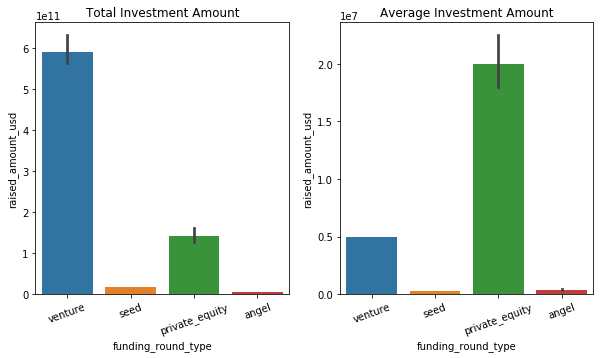

In [115]:
# A plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
# and the average amount of investment in each funding type. This chart should make it clear that a 
# certain funding type (FT) is best suited for Spark Funds.

plt.figure(figsize=(10, 5))

#Total Investment Amount
plt.subplot(1,2,1)
type_total_investments = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=grouped_master_frame, estimator=np.sum, orient="v")
type_total_investments.set_xticklabels(type_total_investments.get_xticklabels(), rotation = 20)
plt.title("Total Investment Amount")

# Avegare Investment Amount based on Median as the distribution.
plt.subplot(1,2,2)
type_total_investments = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=grouped_master_frame, estimator=np.median, orient="v")
type_total_investments.set_xticklabels(type_total_investments.get_xticklabels(), rotation = 20)
plt.title("Average Investment Amount")

plt.show()


### 1. Average funding amount of venture type
#### Ans. 5000000.0

### 2. Average funding amount of angel type
#### Ans. 400000.0

### 3. Average funding amount of seed type
#### Ans. 275000.0

### 4. Average funding amount of private equity type
#### Ans.  20000000.0

### 5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
#### Ans. Venture

# Checkpoint 3: Country Analysis
## Table -  3.1 : Analysing the Top 3 English-Speaking Countries

### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

### For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [116]:
# As we now know that the investment type most suitable for Spark Foundations is Venture type.
# Thus narrowing down the data frame to venture type only

grouped_by_venture_df = master_frame.loc[master_frame['funding_round_type'].isin(['venture'])]
grouped_by_venture_df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
28,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0
34,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0


In [117]:
# top9 countries (based on the total investment amount each country has received)
# we need to create a data object which holds the country groupings.
grouped_by_country = grouped_by_venture_df.groupby(grouped_by_venture_df['country_code'])['raised_amount_usd']
grouped_by_country

In [118]:
# From the country groupings created above, we need to get the total fundings for each country.
highest_total_funding_df = grouped_by_country.sum()
highest_total_funding_df.sort_values(ascending=False, inplace=True)
highest_total_funding_df

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
SWE    3.254953e+09
NLD    2.939404e+09
CHE    2.827560e+09
SGP    2.793918e+09
ESP    1.835831e+09
BRA    1.785987e+09
IRL    1.676131e+09
RUS    1.570426e+09
AUS    1.322935e+09
DNK    1.228311e+09
BEL    1.070542e+09
FIN    1.043200e+09
NOR    9.561924e+08
KOR    9.399883e+08
MYS    8.830588e+08
HKG    7.812670e+08
AUT    6.309550e+08
TWN    6.239795e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [119]:
# From the above list we have to get the Top 9 countries.
top9 = highest_total_funding_df[:9]
top9

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

### 1. Top English speaking country
#### USA

### 2. Second English speaking country
#### GBR

### 3. Third English speaking country
#### IND

In [120]:
grouped_by_venture_df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [121]:
# Now as we know the top 3 english speaking countries are USA, GBR and IND - We can filter the dataframe to only
# records from these 3 countries.

grouped_by_country_df = grouped_by_venture_df[(grouped_by_venture_df.country_code=='USA') | (grouped_by_venture_df.country_code=='GBR') |(grouped_by_venture_df.country_code=='IND')]
grouped_by_country_df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
28,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0
34,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0
38,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.0
39,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,NaN,15-01-2014,2906832.0
41,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,NaN,01-08-2014,1500000.0


# Checkpoint 4: Sector Analysis 1

## Table - 5.1 - Sector-wise Investment Analysis

For some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.
You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

1. Extract the primary sector of each category list from the category_list column

2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [122]:
# To split the category_list incase there are sub-sectors, we would bee applyinf the split method on "|" as below - 
# category.split("|"). In order to use this efficiently we need to check there are no records with missing 'category_list'
# values. If there exist such values, we need to change those values or delete the record.

print("Missing Category_List Values:", grouped_by_country_df.category_list.isnull().sum())

# getting the summary of the data present in the grouped_by_country_df
print("Data Summary in the grouped_by_country_df frame - ")
print("-----------------------------------")
print(round(100*(grouped_by_country_df.isnull().sum()/len(grouped_by_country_df.index)), 2))

Missing Category_List Values: 215
Data Summary in the grouped_by_country_df frame - 
-----------------------------------
permalink                   0.00
name                        0.00
homepage_url                4.76
category_list               0.55
status                      0.00
country_code                0.00
state_code                  0.19
region                      0.40
city                        0.40
founded_at                 16.21
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         45.66
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64


In [123]:
# As we see in the above summary the %age - 0.55% of records with missing category values in very less, 
# we should be safe to delete these records.
# We will now be working with the 'grouped_by_country_df' dataframe.

grouped_by_country_df = grouped_by_country_df[~pd.isnull(grouped_by_country_df['category_list'])]

# Now applying the split("|") function on the category list would be good.
grouped_by_country_df.loc[:, 'primary_sector'] = grouped_by_country_df['category_list'].apply(lambda category: category.split("|")[0])
grouped_by_country_df

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
22,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps
28,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,Education
34,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,Curated Web
38,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.0,Curated Web
39,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,NaN,15-01-2014,2906832.0,Curated Web
41,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,NaN,01-08-2014,1500000.0,Curated Web


In [124]:
# getting the summary of the data present in the grouped_by_country_df
print("Data Summary in the grouped_by_country_df frame - ")
print("--------------------------------------------------")
print(round(100*(grouped_by_country_df.isnull().sum()/len(grouped_by_country_df.index)), 2))

Data Summary in the grouped_by_country_df frame - 
--------------------------------------------------
permalink                   0.00
name                        0.00
homepage_url                4.62
category_list               0.00
status                      0.00
country_code                0.00
state_code                  0.19
region                      0.40
city                        0.40
founded_at                 15.92
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         45.67
funded_at                   0.00
raised_amount_usd           0.00
primary_sector              0.00
dtype: float64


In [125]:
# Now as we have extracted the 'primary_sector', the column 'category_list' and 'primary_sector' represent the same value
# and hence we should be good to drop the 'category_list' column.

grouped_by_country_df = grouped_by_country_df.drop('category_list', axis=1)

In [126]:
grouped_by_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 15 columns):
permalink                  38803 non-null object
name                       38803 non-null object
homepage_url               37011 non-null object
status                     38803 non-null object
country_code               38803 non-null object
state_code                 38731 non-null object
region                     38647 non-null object
city                       38647 non-null object
founded_at                 32625 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funding_round_code         21083 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
primary_sector             38803 non-null object
dtypes: float64(1), object(14)
memory usage: 4.7+ MB


In [127]:
# Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
# (Note that ‘Others’ is also considered one of the main sectors)

mappings_df = pd.read_csv("C:\\Investment_Assignment\\mapping.csv")
mappings_df

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [128]:
mappings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [129]:
# From the above information on mapping table, we see that there might be one missing value for 'category_list'
# Lets confirm this below -

mappings_df.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [130]:
# Also seeing the excel file, the very first row has the missing value. Hence that row will not be of any use for us.
# We should be good to remove that row.

mappings_df = mappings_df[~pd.isnull(mappings_df['category_list'])]

# Check for the missing values again - 
mappings_df.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [131]:
# Now in the mappings_df we see that there are 9 sectors. To be able to categorize or map to each record
# that are present in our 'grouped_by_country_df', we need to check if all the records in the 'grouped_by_country_df'
# have a value in the 'primary_sector' (grouped_by_country_df['primary_sector']) column that corresponds to any of the
# value in the 'category_list' in mappings_df.

# Also now as grouped_by_country_df['primary_sector'] and mappings_df['category_list'] are the main columns for the mapping
# we need to ensure that these are n the same case.

grouped_by_country_df['primary_sector'] = grouped_by_country_df['primary_sector'].str.lower()
mappings_df['category_list'] = mappings_df['category_list'].str.lower()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [132]:
# Now let's check if all the primary_sector from grouped_by_country_df are present in mappings_df -

print(grouped_by_country_df[(~grouped_by_country_df.primary_sector.isin(mappings_df['category_list']))])

                                             permalink  \
10                                /ORGANIZATION/0XDATA   
11                                /ORGANIZATION/0XDATA   
12                                /ORGANIZATION/0XDATA   
61                               /ORGANIZATION/100PLUS   
198                        /ORGANIZATION/1WORLD-ONLINE   
199                        /ORGANIZATION/1WORLD-ONLINE   
200                        /ORGANIZATION/1WORLD-ONLINE   
256                            /ORGANIZATION/24-7-CARD   
822     /ORGANIZATION/6TH-WAVE-INNOVATIONS-CORPORATION   
832                     /ORGANIZATION/7-BILLION-PEOPLE   
873                           /ORGANIZATION/7PARK-DATA   
1006                             /ORGANIZATION/9LENSES   
1007                             /ORGANIZATION/9LENSES   
1008                             /ORGANIZATION/9LENSES   
1049                      /ORGANIZATION/A-LITTLE-WORLD   
1126                         /ORGANIZATION/ABACAST-INC   
1281          

In [133]:
# In the above result we see that sectors such as analytics, finance and some other categories are not present in 
# mappings_df. But if we check the mappings_df, the last column says - [Social, Finance, Analytics, Advertising].
# So Finance, Analytics should be present in mappings_df. Looks like there might be some data mismatch or data corruption.

# Now lets check the reverse i.e., if there are some category in mappings_df which are not part of the 'primary_sector' in 
# grouped_by_country_df['primary_sector'] column.

print(mappings_df[(~mappings_df.category_list.isin(grouped_by_country_df['primary_sector']))])

                category_list  Automotive & Sports  Blanks  \
16      air pollution control                    0       0   
20        alter0tive medicine                    0       0   
22                   a0lytics                    0       0   
33                aquaculture                    0       0   
49       b2b express delivery                    0       0   
59          big data a0lytics                    0       0   
64   biomass power generation                    0       0   
69           boating industry                    1       0   
77            building owners                    0       0   
79          business a0lytics                    0       0   
85         business travelers                    0       0   
89                    can0bis                    0       0   
91           career ma0gement                    0       0   
94               casual games                    0       0   
97                  charities                    0       0   
103     

In [134]:
# Now if we observe the 3rd record above in mappings_df says 'a0lytics', the 6th record says 'big data a0lytics', 
# the 10th record says 'business a0lytics'. We also noticed noticed above that 'analytics', 'business analytics' from 
# grouped_by_country_df['primary_sector'] column were not present in 'mappings_df.category_list'.
# This seems to be a pattern where the sequence 'na' has been replaced by '0'.
# To resolve this we need to change these observations in the mappings_df.

mappings_df.category_list = mappings_df.category_list.apply(lambda category: category.replace('0' ,"na"))
mappings_df.category_list

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

In [135]:
mappings_df = pd.melt(mappings_df, id_vars=['category_list'], var_name='main_sector', value_name='value')
mappings_df = mappings_df.loc[mappings_df.value ==1]
mappings_df

,category_list,main_sector,value
7,adventure travel,Automotive & Sports,1
13,aerospace,Automotive & Sports,1
44,auto,Automotive & Sports,1
45,automated kiosk,Automotive & Sports,1
46,automotive,Automotive & Sports,1
56,bicycles,Automotive & Sports,1
68,boating industry,Automotive & Sports,1
86,cad,Automotive & Sports,1
92,cars,Automotive & Sports,1
187,design,Automotive & Sports,1


In [136]:
# Now let's merge the 'grouped_by_country_df' and the 'mappings_df'.

sector_mapping_df = pd.merge(grouped_by_country_df, mappings_df, how='inner', left_on=['primary_sector'], right_on = ['category_list'])
sector_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
permalink                  38788 non-null object
name                       38788 non-null object
homepage_url               36998 non-null object
status                     38788 non-null object
country_code               38788 non-null object
state_code                 38716 non-null object
region                     38632 non-null object
city                       38632 non-null object
founded_at                 32614 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funding_round_code         21079 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
primary_sector             38788 non-null object
category_list              38788 non-null object
main_sector                38788 non-null object
value                      38788 non-null int64
dtypes: f

In [137]:
# Now let's see the values for 'primary_sector', 'category_list' columns -

sector_mapping_df[['primary_sector', 'category_list']].head()

,primary_sector,category_list
0,media,media
1,media,media
2,media,media
3,media,media
4,media,media


In [138]:
# Now as seen abpve, the 'primary_sector', 'category_list' column hold the same data.
# Hence we should be good to drop the 'category_list' column.

sector_mapping_df = sector_mapping_df.drop('category_list', axis=1)
sector_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 17 columns):
permalink                  38788 non-null object
name                       38788 non-null object
homepage_url               36998 non-null object
status                     38788 non-null object
country_code               38788 non-null object
state_code                 38716 non-null object
region                     38632 non-null object
city                       38632 non-null object
founded_at                 32614 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funding_round_code         21079 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
primary_sector             38788 non-null object
main_sector                38788 non-null object
value                      38788 non-null int64
dtypes: float64(1), int64(1), object(15)
memory usage: 5.3

In [139]:
# Let's re-name the 'primary_sector' and the 'main_sector' columns.
sector_mapping_df.rename(columns={'primary_sector': 'category'}, inplace=True)
sector_mapping_df.rename(columns={'main_sector': 'sector'}, inplace=True)
sector_mapping_df.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category,sector,value
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment,1
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,Entertainment,1
2,/ORGANIZATION/90MIN,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,Entertainment,1
3,/ORGANIZATION/90MIN,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,media,Entertainment,1
4,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,media,Entertainment,1


# Checkpoint 5: Sector Analysis 2

## Table - 5.1 - Sector-wise Investment Analysis

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

All the columns of the master_frame along with the primary sector and the main sector

The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

In [140]:
# As the objective of Spark Foundation is to go for investments in range of 5-15 M USD.
# Lets filter out the 'sector_mapping_df' to only have the records in that range.

sector_mapping_df = sector_mapping_df[(sector_mapping_df.raised_amount_usd >= 5000000) & (sector_mapping_df.raised_amount_usd <= 15000000)]

In [141]:
# DataFrame D1 - showing results only from GBR.

D1_GBR = sector_mapping_df.loc[sector_mapping_df['country_code'] == "GBR"]
D1_GBR

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category,sector,value
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,Entertainment,1
2,/ORGANIZATION/90MIN,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,Entertainment,1
91,/ORGANIZATION/AIHIT,aiHit,http://aihit.com,acquired,GBR,N7,Staines-upon-thames,Staines-upon-thames,01-01-2007,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,A,07-10-2011,5500000.0,analytics,"Social, Finance, Analytics, Advertising",1
219,/ORGANIZATION/BRANDWATCH,Brandwatch,http://www.brandwatch.com,operating,GBR,E2,London,Brighton,01-10-2007,/funding-round/09f7932220728f0083982db2fced0518,venture,NaN,15-03-2012,6000000.0,analytics,"Social, Finance, Analytics, Advertising",1
435,/ORGANIZATION/DIGITAL-SHADOWS,Digital Shadows,http://www.digitalshadows.com,operating,GBR,H9,London,London,01-05-2011,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,A,11-02-2015,8000000.0,analytics,"Social, Finance, Analytics, Advertising",1
443,/ORGANIZATION/DUEDIL,DueDil,http://www.duedil.com,operating,GBR,H9,London,London,25-04-2011,/funding-round/05a71740dfbef5f6cb3d2689d8a7b573,venture,A,12-04-2013,5000000.0,analytics,"Social, Finance, Analytics, Advertising",1
645,/ORGANIZATION/INTENT-HQ,Intent HQ,http://www.intenthq.com,operating,GBR,H9,London,London,01-08-2010,/funding-round/6034decdb9ab2fe0d9d5e0372054712d,venture,NaN,01-05-2014,8009622.0,analytics,"Social, Finance, Analytics, Advertising",1
797,/ORGANIZATION/MICROSAIC,Microsaic,http://www.microsaic.com,operating,GBR,N7,London,Woking,NaN,/funding-round/4030e9b265deaf48c66c293c7a4c66d4,venture,NaN,28-05-2013,6515581.0,analytics,"Social, Finance, Analytics, Advertising",1
1018,/ORGANIZATION/RANGESPAN,Rangespan,http://www.rangespan.com,acquired,GBR,H9,London,London,01-01-2011,/funding-round/e6c43f976510b334836a7f80aff0fcb8,venture,NaN,07-12-2012,5000000.0,analytics,"Social, Finance, Analytics, Advertising",1
1120,/ORGANIZATION/SMART-CUBE,Smart Cube,http://www.thesmartcube.com,operating,GBR,H9,London,London,NaN,/funding-round/321a58595ccc6086785e8ac2f6838b81,venture,A,28-09-2011,6410909.0,analytics,"Social, Finance, Analytics, Advertising",1


In [142]:
# The total number (or count) of investments for each main sector in a separate column.
# The total amount invested in each main sector in a separate column.

D1_GBR.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09

In [143]:
# For point 3 (top sector count-wise), which company received the highest investment?
# From the above group we see the top sector for GBR is 'Others'
gbr_first = D1_GBR.loc[D1_GBR.sector=='Others']
gbr_first.groupby(['sector', 'permalink']).raised_amount_usd.sum().sort_values(ascending=False)

sector  permalink                                 
Others  /ORGANIZATION/ELECTRIC-CLOUD                  37000000.0
        /ORGANIZATION/SENSAGE                         36250000.0
        /ORGANIZATION/ENIGMATIC                       32500000.0
        /ORGANIZATION/SILVERRAIL-TECHNOLOGIES         29000000.0
        /ORGANIZATION/OPENCLOUD                       27972766.0
        /ORGANIZATION/MYOPTIQUE-GROUP                 27694613.0
        /ORGANIZATION/NOTONTHEHIGHSTREET              26900000.0
        /ORGANIZATION/ACS-CLOTHING                    26239014.0
        /ORGANIZATION/TRIBOLD                         26000000.0
        /ORGANIZATION/IP-ACCESS                       25000000.0
        /ORGANIZATION/EGLUE-BUSINESS-TECHNOLOGIES     22000000.0
        /ORGANIZATION/ALFRESCO                        21000000.0
        /ORGANIZATION/AEPONA                          20000000.0
        /ORGANIZATION/LYST                            19000000.0
        /ORGANIZATION/NJINI            

In [144]:
# For point 4 (second best sector count-wise), which company received the highest investment?
# From the above group we see the second best sector for GBR is 'Social, Finance, Analytics, Advertising'
gbr_second = D1_GBR.loc[D1_GBR.sector=='Social, Finance, Analytics, Advertising']
gbr_second.groupby(['sector', 'permalink']).raised_amount_usd.sum().sort_values(ascending=False)

sector                                   permalink                                         
Social, Finance, Analytics, Advertising  /ORGANIZATION/CELLTICK-TECHNOLOGIES                   37500000.0
                                         /ORGANIZATION/MYTHINGS                                34000000.0
                                         /ORGANIZATION/ZOPA                                    32900000.0
                                         /ORGANIZATION/IMAGINI                                 28550000.0
                                         /ORGANIZATION/MARKETINVOICE                           25553007.0
                                         /ORGANIZATION/SUMUP                                   24293649.0
                                         /ORGANIZATION/AMPLIENCE                               24200000.0
                                         /ORGANIZATION/GARLIK                                  22350000.0
                                         /ORGANIZATION/SPORT

In [145]:
# Total number of Investments (count) &
# Total amount of investment (USD)
# for GBR

print("Total Investment in GBR: ", D1_GBR.raised_amount_usd.sum())
print("Total Number of Investments in GBR: ", D1_GBR.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count']).sum())

Total Investment in GBR:  5379078691.0
Total Number of Investments in GBR:  count    621
dtype: int64


In [146]:
# DataFrame D2 - showing results only from IND.

D2_IND = sector_mapping_df.loc[sector_mapping_df['country_code'] == "IND"]
D2_IND

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category,sector,value
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment,1
454,/ORGANIZATION/EKA-SOFTWARE-SOLUTIONS,Eka Software Solutions,http://www.ekaplus.com,operating,IND,19,Bangalore,Bangalore,01-01-2004,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,NaN,01-01-2005,6000000.0,analytics,"Social, Finance, Analytics, Advertising",1
455,/ORGANIZATION/EKA-SOFTWARE-SOLUTIONS,Eka Software Solutions,http://www.ekaplus.com,operating,IND,19,Bangalore,Bangalore,01-01-2004,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,NaN,01-01-2009,10000000.0,analytics,"Social, Finance, Analytics, Advertising",1
723,/ORGANIZATION/LOGINEXT-SOLUTIONS,LogiNext Solutions,http://loginextsolutions.com,operating,IND,16,Mumbai,Mumbai,07-10-2014,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,A,22-09-2015,10000000.0,analytics,"Social, Finance, Analytics, Advertising",1
741,/ORGANIZATION/MANTHAN-SYSTEMS,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,A,01-03-2007,5700000.0,analytics,"Social, Finance, Analytics, Advertising",1
742,/ORGANIZATION/MANTHAN-SYSTEMS,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,B,09-12-2009,15000000.0,analytics,"Social, Finance, Analytics, Advertising",1
744,/ORGANIZATION/MANTHAN-SYSTEMS,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/funding-round/7db541211550feab15626b11aa479116,venture,C,15-02-2012,15000000.0,analytics,"Social, Finance, Analytics, Advertising",1
745,/ORGANIZATION/MANTHAN-SYSTEMS,Manthan Systems,http://www.manthansystems.com,operating,IND,19,Bangalore,Bangalore,01-01-2003,/funding-round/a08435c935a0a43cd9069ad9480f8bb6,venture,B,20-11-2009,15000000.0,analytics,"Social, Finance, Analytics, Advertising",1
793,/ORGANIZATION/MICROLAND,Microland,http://www.microland.com,operating,IND,19,Bangalore,Bangalore,01-01-1989,/funding-round/11f00668f3548380aa1524abc34ae913,venture,NaN,14-01-2005,7300000.0,analytics,"Social, Finance, Analytics, Advertising",1
794,/ORGANIZATION/MICROLAND,Microland,http://www.microland.com,operating,IND,19,Bangalore,Bangalore,01-01-1989,/funding-round/e58d1c7d9fa42b56c3a7410d061d7916,venture,NaN,09-08-2006,11000000.0,analytics,"Social, Finance, Analytics, Advertising",1


In [147]:
# The total number (or count) of investments for each main sector in a separate column.
# The total amount invested in each main sector in a separate column.

D2_IND.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08

In [148]:
# For point 3 (top sector count-wise), which company received the highest investment?
# From the above group we see the top sector for IND is 'Others'
IND_first= D2_IND.loc[D2_IND.sector=='Others']
IND_first.groupby(['sector', 'permalink']).raised_amount_usd.sum().sort_values(ascending=False)

sector  permalink                                                                           
Others  /ORGANIZATION/FIRSTCRY-COM                                                              39000000.0
        /ORGANIZATION/MYNTRA                                                                    38000000.0
        /ORGANIZATION/COMMONFLOOR                                                               32900000.0
        /ORGANIZATION/PEPPERFRY-COM                                                             28000000.0
        /ORGANIZATION/ITZCASH-CARD-LTD                                                          25000000.0
        /ORGANIZATION/NXTGEN-DATA-CENTER-CLOUD-SERVICES                                         22300000.0
        /ORGANIZATION/MAHARANA-INFRASTRUCTURE-AND-PROFESSIONAL-SERVICES-PRIVATE-LIMITED-MIPS    21600000.0
        /ORGANIZATION/CARATLANE                                                                 21000000.0
        /ORGANIZATION/COMAT-TECHNOLOGIES           

In [149]:
# For point 4 (second best sector count-wise), which company received the highest investment?
# From the above group we see the second best sector for IND is 'Social, Finance, Analytics, Advertising'
IND_second= D2_IND.loc[D2_IND.sector=='Social, Finance, Analytics, Advertising']
IND_second.groupby(['sector', 'permalink']).raised_amount_usd.sum().sort_values(ascending=False)

sector                                   permalink                                                 
Social, Finance, Analytics, Advertising  /ORGANIZATION/MANTHAN-SYSTEMS                                 50700000.0
                                         /ORGANIZATION/KOMLI-MEDIA                                     28000000.0
                                         /ORGANIZATION/SHOPCLUES-COM                                   25000000.0
                                         /ORGANIZATION/INTARVO                                         21900000.0
                                         /ORGANIZATION/GRAMEEN-FINANCIAL-SERVICES                      21556050.0
                                         /ORGANIZATION/BANKBAZAAR                                      19000000.0
                                         /ORGANIZATION/MICROLAND                                       18300000.0
                                         /ORGANIZATION/EKA-SOFTWARE-SOLUTIONS                         

In [150]:
# Total number of Investments (count) &
# Total amount of investment (USD)
# for IND

print("Total Investment in IND: ", D2_IND.raised_amount_usd.sum())
print("Total Number of Investments in IND: ", D2_IND.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count']).sum())

Total Investment in IND:  2949543602.0
Total Number of Investments in IND:  count    328
dtype: int64


In [151]:
# DataFrame D3 - showing results only from USA.

D3_USA = sector_mapping_df.loc[sector_mapping_df['country_code'] == "USA"]
D3_USA

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category,sector,value
4,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,media,Entertainment,1
14,/ORGANIZATION/CHEFS-FEED,ChefsFeed,http://www.chefsfeed.com,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,media,Entertainment,1
20,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,media,Entertainment,1
21,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,media,Entertainment,1
25,/ORGANIZATION/MATCHMINE,MatchMine,http://matchmine.com,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,media,Entertainment,1
27,/ORGANIZATION/MEDIABONG,MEDIABONG,http://www.mediabong.com,operating,USA,NY,New York City,New York,30-05-2011,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,media,Entertainment,1
28,/ORGANIZATION/NEWSCORPORATION,News Corp,http://www.newscorp.com,ipo,USA,NY,New York City,New York,01-01-2013,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,media,Entertainment,1
29,/ORGANIZATION/NOKEENA,Ankeena Networks,http://www.ankeena.com,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,media,Entertainment,1
31,/ORGANIZATION/NOKEENA,Ankeena Networks,http://www.ankeena.com,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,media,Entertainment,1
34,/ORGANIZATION/PLUMTV,PlumTV,http://www.plumtv.com,closed,USA,NY,New York City,New York,01-01-2002,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,media,Entertainment,1


In [152]:
# The total number (or count) of investments for each main sector in a separate column.
# The total amount invested in each main sector in a separate column.

D3_USA.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

In [153]:
# For point 3 (top sector count-wise), which company received the highest investment?
# From the above group we see the top sector for USA is 'Others'
USA_first= D3_USA.loc[D3_USA.sector=='Others']
USA_first.groupby(['sector', 'permalink']).raised_amount_usd.sum().sort_values(ascending=False)

sector  permalink                             
Others  /ORGANIZATION/VIRTUSTREAM                 64300000.0
        /ORGANIZATION/CAPELLA                     54968051.0
        /ORGANIZATION/AIRTIGHT-NETWORKS           54201907.0
        /ORGANIZATION/DECARTA                     52100000.0
        /ORGANIZATION/BLACK-DUCK-SOFTWARE         51000000.0
        /ORGANIZATION/APPROVA                     50100000.0
        /ORGANIZATION/FIVE9                       49600000.0
        /ORGANIZATION/BIT9                        48433533.0
        /ORGANIZATION/ARYAKA-NETWORKS             48166500.0
        /ORGANIZATION/BTI-SYSTEMS                 48000000.0
        /ORGANIZATION/CHANGE-HEALTHCARE           47000000.0
        /ORGANIZATION/ZILLIANT                    45600000.0
        /ORGANIZATION/VORMETRIC                   45000000.0
        /ORGANIZATION/REDFIN                      44800000.0
        /ORGANIZATION/ELEMENTAL-TECHNOLOGIES      44100000.0
        /ORGANIZATION/BLAZENT         

In [154]:
# For point 4 (second best sector count-wise), which company received the highest investment?
# From the above group we see the second best sector for USA is 'Social, Finance, Analytics, Advertising'
USA_second= D3_USA.loc[D3_USA.sector=='Social, Finance, Analytics, Advertising']
USA_second.groupby(['sector', 'permalink']).raised_amount_usd.sum().sort_values(ascending=False)

sector                                   permalink                              
Social, Finance, Analytics, Advertising  /ORGANIZATION/SHOTSPOTTER                  67933006.0
                                         /ORGANIZATION/DEMANDBASE                   63000000.0
                                         /ORGANIZATION/INTACCT                      61800000.0
                                         /ORGANIZATION/NETBASE                      60600000.0
                                         /ORGANIZATION/LOTAME                       59700000.0
                                         /ORGANIZATION/FIRSTRAIN                    58344731.0
                                         /ORGANIZATION/CHOICESTREAM                 58300000.0
                                         /ORGANIZATION/OPTIER                       55600000.0
                                         /ORGANIZATION/DAMBALLA                     55000000.0
                                         /ORGANIZATION/ZOOVE    

In [155]:
# Total number of Investments (count) &
# Total amount of investment (USD)
# for USA

print("Total Investment in USA: ", D3_USA.raised_amount_usd.sum())
print("Total Number of Investments in USA: ", D3_USA.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count']).sum())

Total Investment in USA:  107757097294.0
Total Number of Investments in USA:  count    12063
dtype: int64


# Checkpoint 6: Plots

##### 1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

##### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

##### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

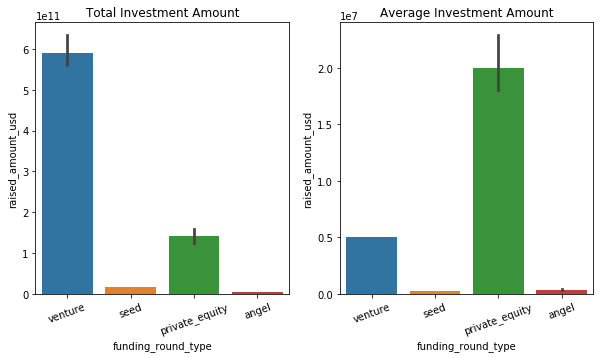

In [156]:
# A plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
# and the average amount of investment in each funding type. This chart should make it clear that a 
# certain funding type (FT) is best suited for Spark Funds.

plt.figure(figsize=(10, 5))

#Total Investment Amount
plt.subplot(1,2,1)
type_total_investments = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=grouped_master_frame, estimator=np.sum, orient="v")
type_total_investments.set_xticklabels(type_total_investments.get_xticklabels(), rotation = 20)
plt.title("Total Investment Amount")

# Avegare Investment Amount based on Median as the distribution.
plt.subplot(1,2,2)
type_total_investments = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=grouped_master_frame, estimator=np.median, orient="v")
type_total_investments.set_xticklabels(type_total_investments.get_xticklabels(), rotation = 20)
plt.title("Average Investment Amount")

plt.show()

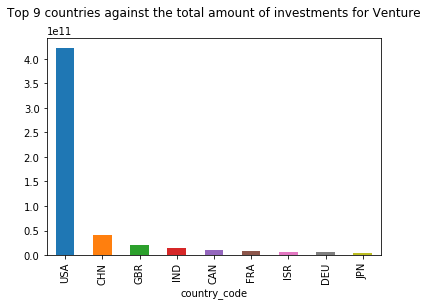

In [157]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT. 
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

top9.plot.bar(title="Top 9 countries against the total amount of investments for Venture\n")
plt.show()

##### Now as seen in the above plot for the top9 countries, the top3 english speaking countries can be clearly seen as USA, GBR and IND. As China is not a english speaking country, it can be ignored for this analysis.

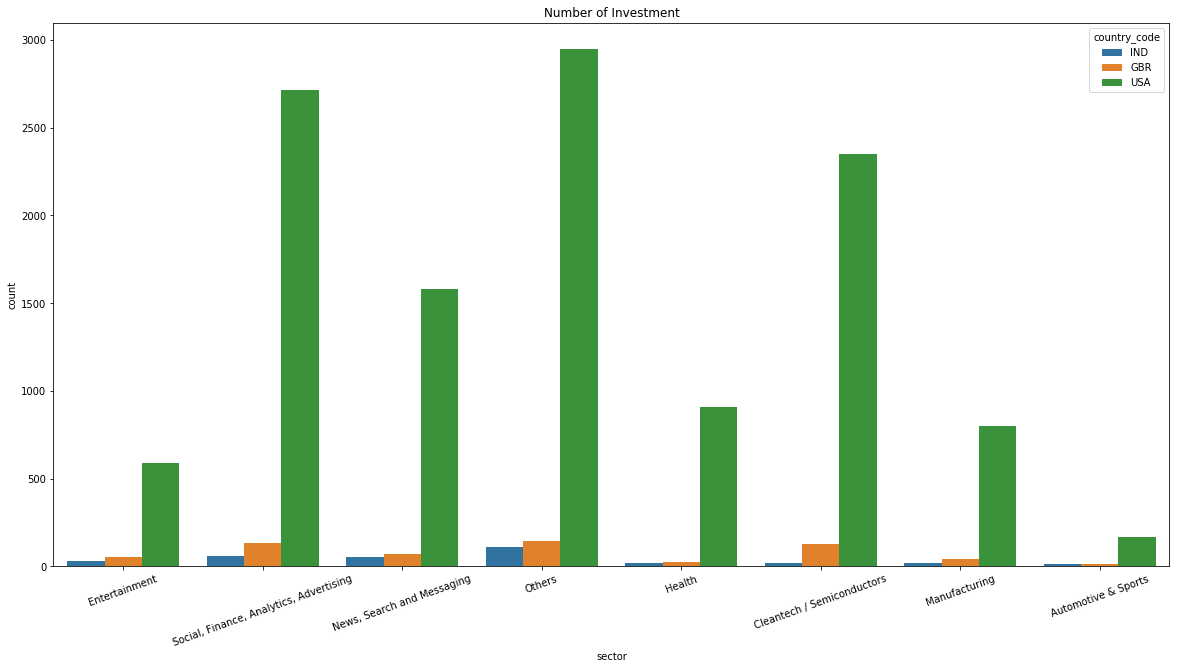

In [158]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one 
# chart (for the chosen investment type FT).

plt.figure(figsize=(20, 10))

count_sector_plot = sns.countplot(x='sector',  hue='country_code', data=sector_mapping_df)
count_sector_plot.set_xticklabels(count_sector_plot.get_xticklabels(), rotation = 20)
plt.title('Number of Investment')

plt.show()

##### From the above analysis we can conclude that USA is the best country for Spark Foundation to invest in.
##### The top 3 sectors in USA to invest in are as follows (with count of total investments) - 

### Others	                                                        2950
### Social, Finance, Analytics, Advertising	   2714	
### Cleantech / Semiconductors	                   2350
### News, Search and Messaging	                 1583